In [1]:
#!wget https://storage.googleapis.com/nicksdemobucket/diabetes.csv
!wget https://storage.googleapis.com/nicksdemobucket/bank.csv

--2024-07-28 15:34:12--  https://storage.googleapis.com/nicksdemobucket/bank.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.207|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-07-28 15:34:12 ERROR 404: Not Found.



In [15]:
import pandas as pd

# you can also use diabetes.csv
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# New Section

In [3]:
!pip install facets-overview

  Using cached facets_overview-1.1.1-py2.py3-none-any.whl.metadata (10 kB)


In [12]:
# Import the necessary libraries
import pandas as pd
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
from IPython.core.display import display, HTML

# Load the data
df = pd.read_csv('bank.csv')

# Display the first few rows of the dataframe
print(df.head())

# Function to create Facets Overview
def create_facets_overview(df):
    gfsg = GenericFeatureStatisticsGenerator()
    proto = gfsg.ProtoFromDataFrames([{'name': 'data', 'table': df}])
    protostr = proto.SerializeToString()

    HTML_TEMPLATE = """
    <link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html"></link>
    <facets-overview id="elem"></facets-overview>
    <script>
      document.querySelector("#elem").protoInput = new Uint8Array([{data}]);
    </script>
    """

    html = HTML_TEMPLATE.format(data=', '.join(str(x) for x in protostr))
    return HTML(html)

# Create and display Facets Overview visualization
display(create_facets_overview(df))



   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  


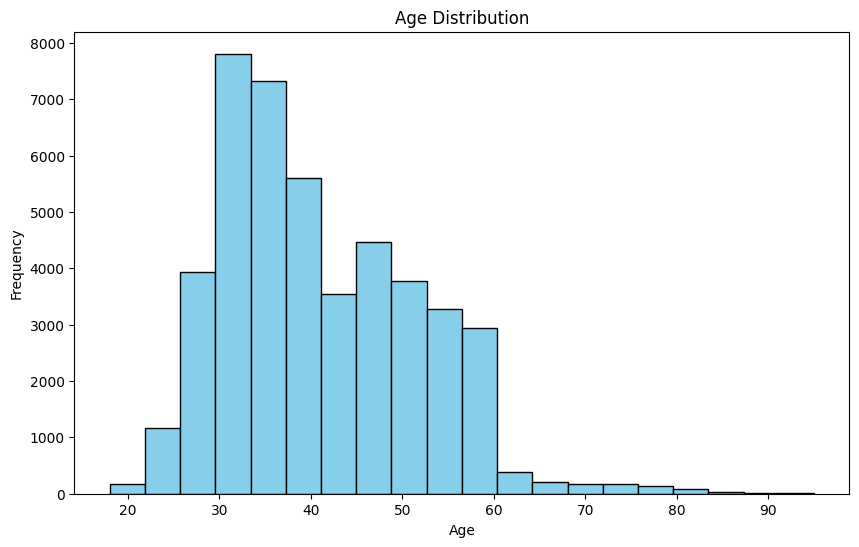

In [17]:
import matplotlib.pyplot as plt

# Histogram of ages
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


***It looks like teh bank data has more people between age 30 to 40.***

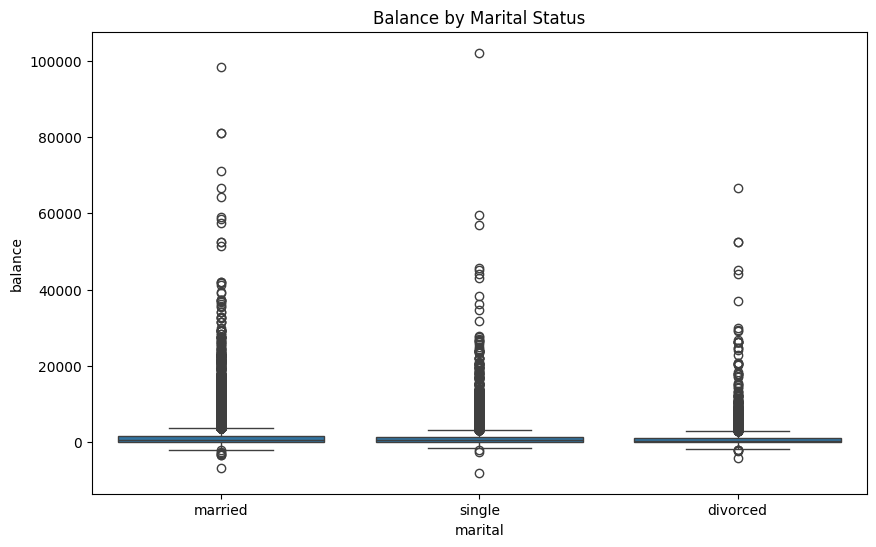

In [19]:
import seaborn as sns

# Boxplot of balance by marital status
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital', y='balance', data=df)
plt.title('Balance by Marital Status')
plt.show()

***Marreid poeple have more balance than single people.***

In [20]:
import plotly.express as px

# Scatter plot of age vs balance
fig = px.scatter(df, x='age', y='balance', color='marital', title='Age vs Balance')
fig.show()

***Balance increases with age and goes down after age of 50-60 years.***


In [29]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

output_notebook()

# Assuming df is already defined and contains the 'job' column
job_counts = df['job'].value_counts()

p = figure(x_range=job_counts.index.tolist(), height=350, title="Job Counts",
           toolbar_location=None, tools="")

p.vbar(x=job_counts.index.tolist(), top=job_counts.values, width=0.9,
       color=factor_cmap('x', palette=Spectral6, factors=job_counts.index.tolist()))

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)



***Engineers are more than doctors and artrists.***

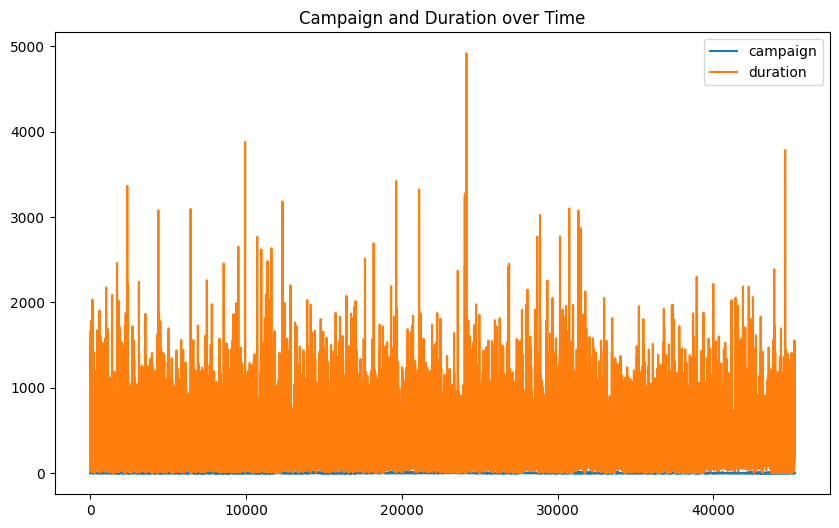

In [25]:
# Line plot of campaign and duration
df[['campaign', 'duration']].plot(figsize=(10, 6), title='Campaign and Duration over Time')
plt.show()


In [33]:
df = pd.read_csv('bank.csv')

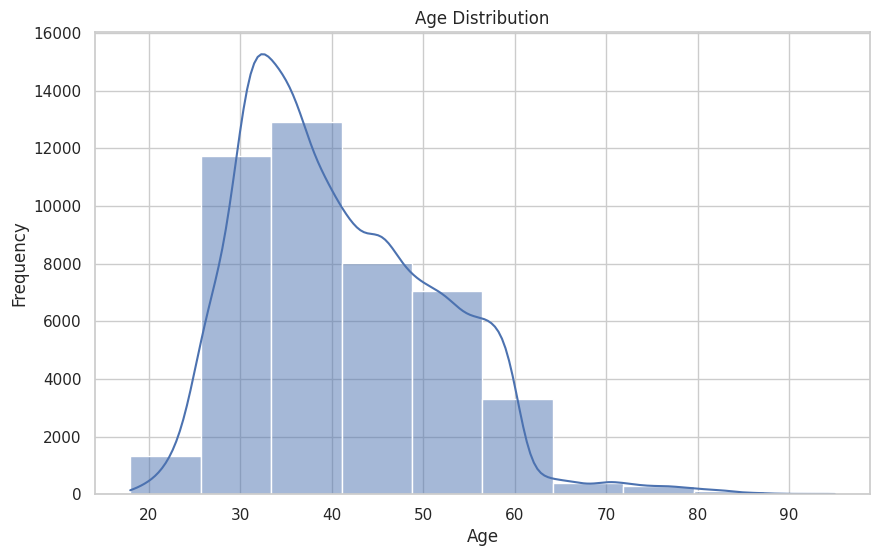

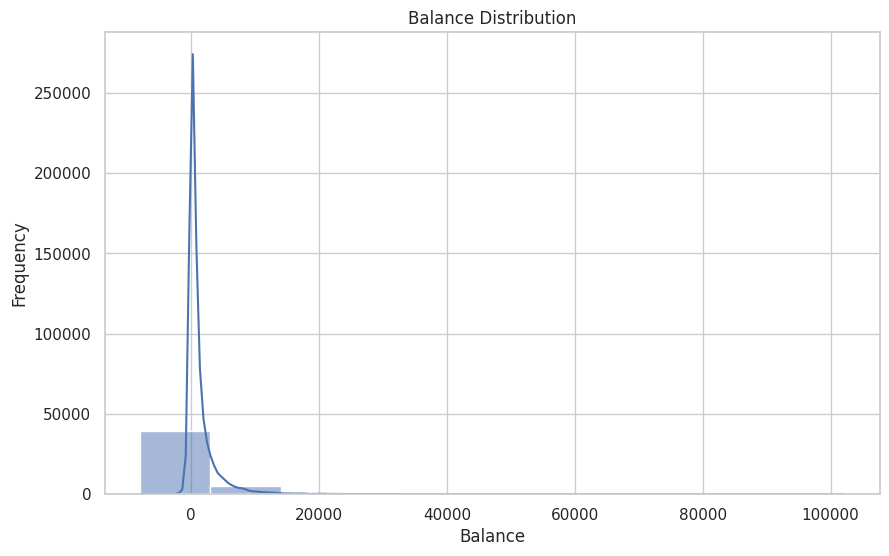

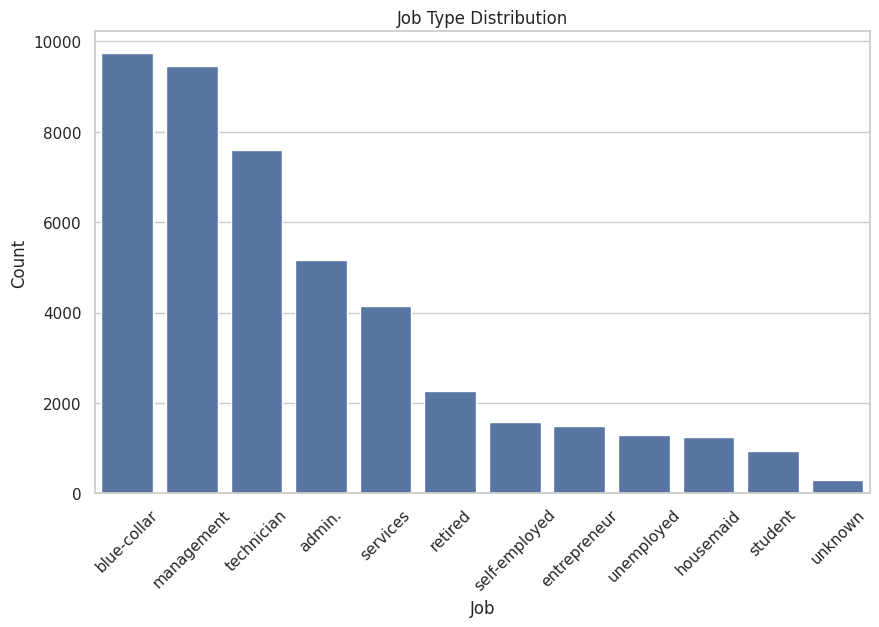

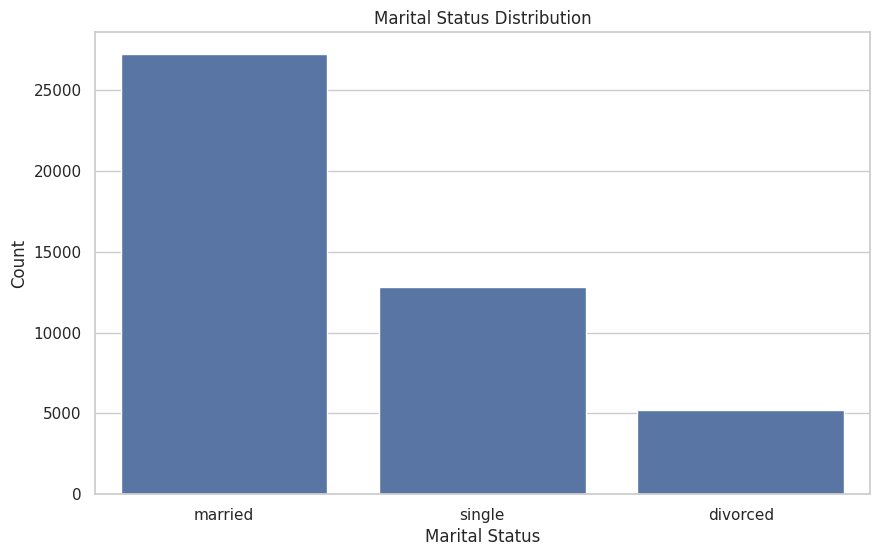

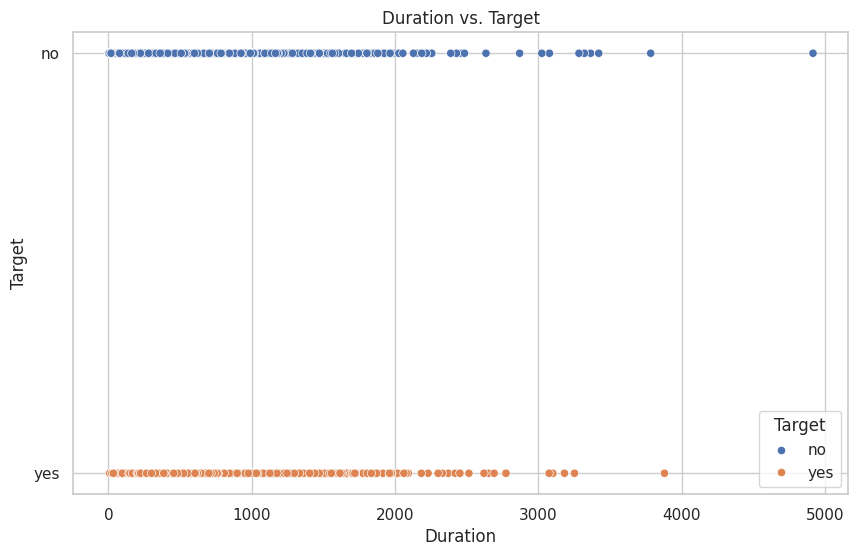

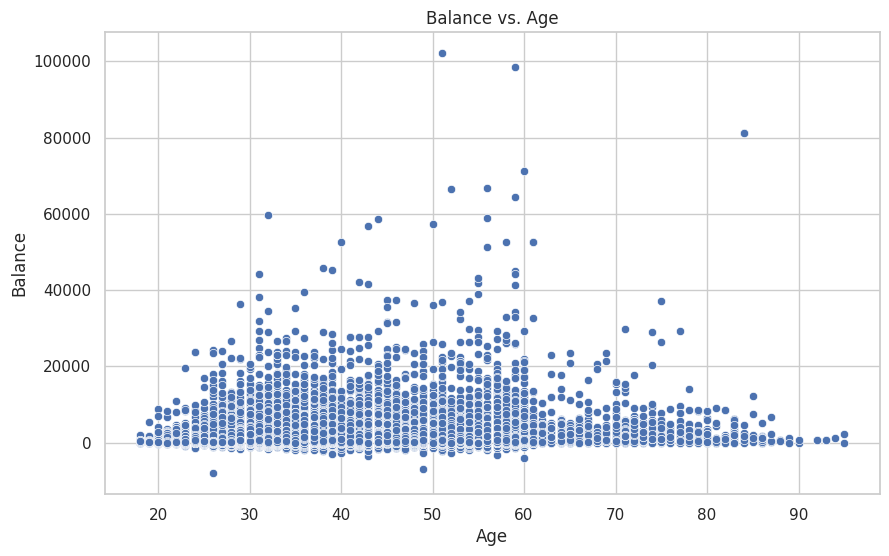

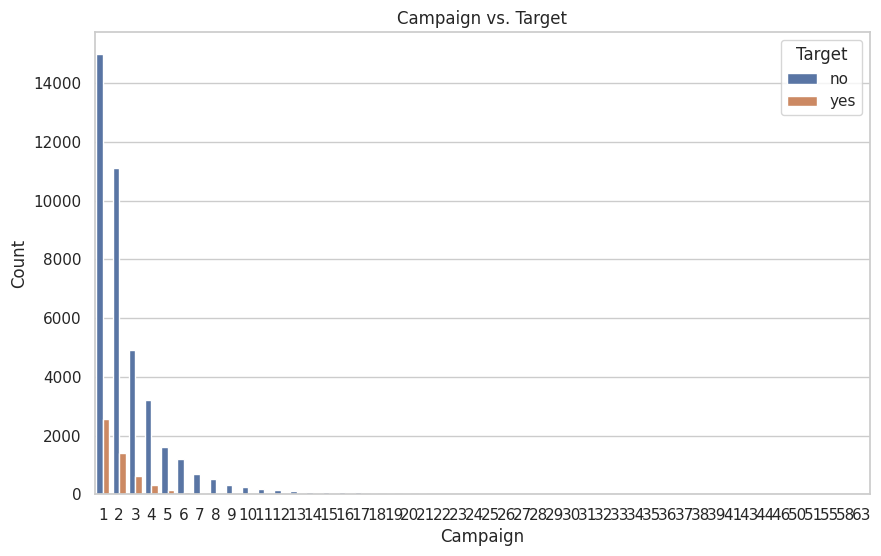

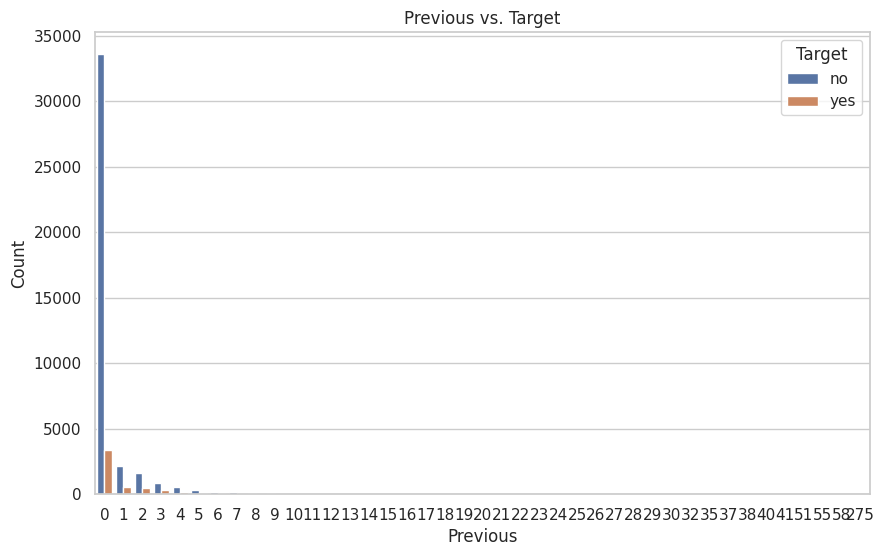

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Balance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], kde=True, bins=10)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# 3. Job Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Job Type Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Marital Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# 5. Duration vs. Target
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='Target', hue='Target')
plt.title('Duration vs. Target')
plt.xlabel('Duration')
plt.ylabel('Target')
plt.show()

# 6. Balance vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='balance')
plt.title('Balance vs. Age')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

# 7. Campaign vs. Target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='campaign', hue='Target')
plt.title('Campaign vs. Target')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.show()

# 8. Previous vs. Target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='previous', hue='Target')
plt.title('Previous vs. Target')
plt.xlabel('Previous')
plt.ylabel('Count')
plt.show()